In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import math
from datetime import datetime as dt

In [2]:
cust =pd.read_csv("C:/Data Sets/(Class 9-Python - Case Study)/1.Retail/Customer.csv")
transactions = pd.read_csv("C:/Data Sets/(Class 9-Python - Case Study)/1.Retail/Transactions.csv")
prod = pd.read_csv("C:/Data Sets/(Class 9-Python - Case Study)/1.Retail/prod_cat_info.csv")

In [3]:
#Q1 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
#keep all customers who have done transactions with us and select the join type accordingly.
prod

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [15]:
cust1

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0


In [13]:
cust1 = pd.merge(left= transactions,right = cust , how= 'left', left_on = 'cust_id' , right_on= 'customer_Id')

In [16]:
customer_final = pd.merge(left = cust1, right = prod, how = 'left', left_on = ['prod_cat_code','prod_subcat_code'], right_on = ['prod_cat_code','prod_sub_cat_code'])

In [17]:
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children


In [18]:
#Q2 Prepare a summary report for the merged data set.
# (a) Get the column names and their corresponding data types
customer_final.info()
#Gender and city_code have some null values.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 17 columns):
transaction_id       23053 non-null int64
cust_id              23053 non-null int64
tran_date            23053 non-null object
prod_subcat_code     23053 non-null int64
prod_cat_code        23053 non-null int64
Qty                  23053 non-null int64
Rate                 23053 non-null int64
Tax                  23053 non-null float64
total_amt            23053 non-null float64
Store_type           23053 non-null object
customer_Id          23053 non-null int64
DOB                  23053 non-null object
Gender               23044 non-null object
city_code            23045 non-null float64
prod_cat             23053 non-null object
prod_sub_cat_code    23053 non-null int64
prod_subcat          23053 non-null object
dtypes: float64(3), int64(8), object(6)
memory usage: 3.2+ MB


In [19]:
#b. Top/Bottom 10 observations

#Top 10 Observations
customer_final.head(10)

#Bottom 10 Observations
customer_final.tail(10)


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,271982,10-08-1976,M,8.0,Books,10,Non-Fiction
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,273982,12-10-1991,M,4.0,Electronics,4,Mobiles
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,273031,17-01-1980,F,8.0,Books,6,DIY
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,272049,28-06-1975,F,6.0,Home and kitchen,11,Bath
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,266866,18-04-1974,M,4.0,Footwear,4,Kids
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,271961,15-01-1982,M,1.0,Books,11,Children


In [20]:
#c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
#11 continous and 6 categorical variables.

customer_final.select_dtypes(include = ['float64','int64']).describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code,prod_sub_cat_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,271021.746497,5.482534,6.149091
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2431.692059,2.863499,3.726372
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,270980.000000,5.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,273114.000000,8.000000,10.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000,12.000000


In [21]:
#d. Frequency tables for all the categorical variables
#6 Categorical variables

customer_final.select_dtypes(include = ['object']).count()

tran_date      23053
Store_type     23053
DOB            23053
Gender         23044
prod_cat       23053
prod_subcat    23053
dtype: int64

C:\Users\shaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  after removing the cwd from sys.path.


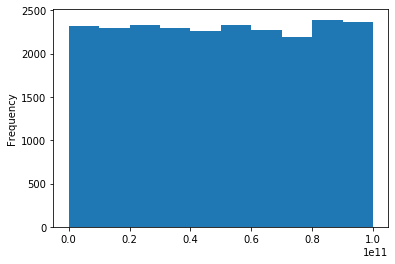

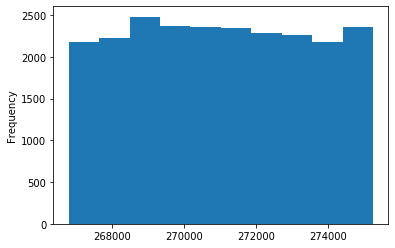

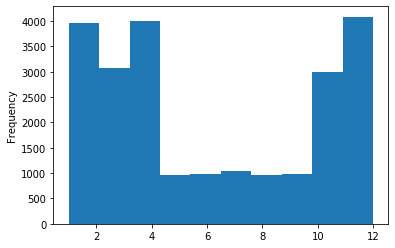

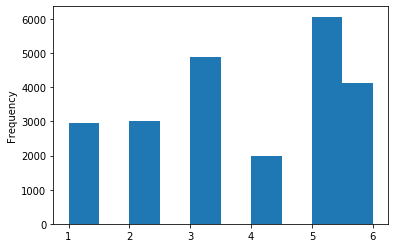

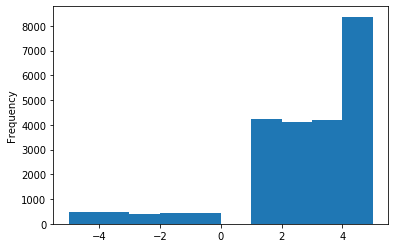

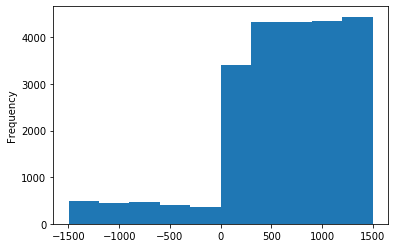

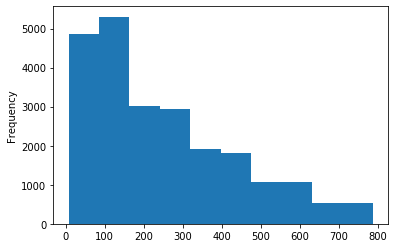

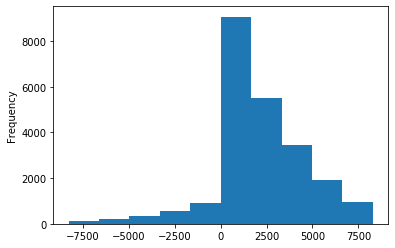

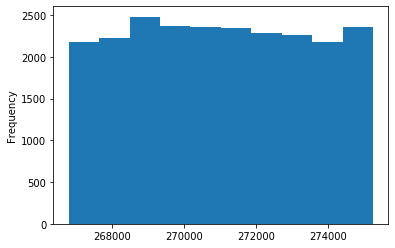

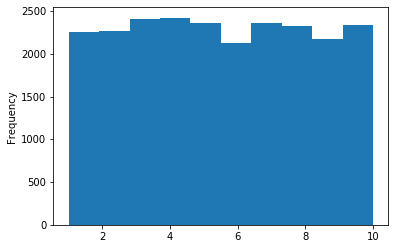

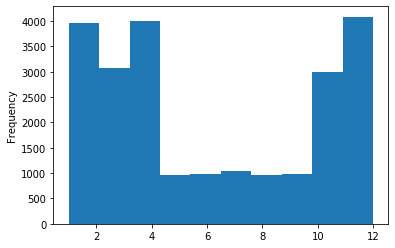

transaction_id       None
cust_id              None
prod_subcat_code     None
prod_cat_code        None
Qty                  None
Rate                 None
Tax                  None
total_amt            None
customer_Id          None
city_code            None
prod_sub_cat_code    None
dtype: object

In [22]:
#Q3. Generate histograms for all continuous variables and frequency bars for categorical variables.
#Continous Variables
def fn_hist(x):
    x.plot('hist')
    plt.show()
    
customer_final.select_dtypes(['int64', 'float64']).apply(lambda x: fn_hist(x))

tran_date      None
Store_type     None
DOB            None
Gender         None
prod_cat       None
prod_subcat    None
dtype: object

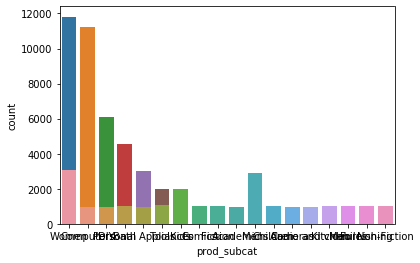

In [23]:
#Categorical Variables

def fn_count(x):
   sns.countplot(x)
customer_final.select_dtypes(['object']).apply(lambda x: fn_count(x))

In [24]:
#Q4 Calculate the following information using the merged dataset :

In [25]:
#a. Time period of the available transaction data
#I have converted these dates to datetime and then done the operations.
#1st method:
#pd.to_datetime(customer_final.loc[0,'tran_date']) - pd.to_datetime(customer_final.loc[23052,'tran_date'])


#2nd more efficent method of using max() and min() functions.
pd.to_datetime(customer_final.tran_date).max() - pd.to_datetime(customer_final.tran_date).min()

Timedelta('1430 days 00:00:00')

In [26]:
#b. Count of transactions where the total amount of transaction was negative

customer_final[customer_final.Qty < 0]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22919,42161597232,267094,31-01-2011,3,1,-3,-147,46.305,-487.305,MBR,267094,24-11-1992,M,9.0,Clothing,3,Kids
22926,72870271171,270911,31-01-2011,11,5,-3,-1142,359.730,-3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children
22929,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,268097,15-12-1992,F,7.0,Books,10,Non-Fiction
22977,99568595128,273973,29-01-2011,4,2,-3,-203,63.945,-672.945,e-Shop,273973,16-04-1992,F,2.0,Footwear,4,Kids


In [27]:
#5. Analyze which product categories are more popular among females vs male customers.
#Filtering the dataset with the genders
a = customer_final[customer_final.Gender == 'F']
b = customer_final[customer_final.Gender == 'M']
c = customer_final.Gender.count()

In [28]:
a.groupby('prod_cat').Qty.count()
#Products bought per category by Females
#11811 Quantity for Females

prod_cat
Bags                 994
Books               2949
Clothing            1439
Electronics         2328
Footwear            1529
Home and kitchen    1994
Name: Qty, dtype: int64

In [30]:
b.groupby('prod_cat').Qty.count()
#Products bought per category by Males
#Quantity 11233 for Males

prod_cat
Bags                1004
Books               3116
Clothing            1518
Electronics         2570
Footwear            1469
Home and kitchen    2134
Name: Qty, dtype: int64

Answer: Footwear is more popular among women.

In [23]:
#6. Which City code has the maximum customers and what was the percentage of customers from that city?

customer_final.groupby('city_code').count()
#city_code 4

a = customer_final.groupby('city_code').count().max()
#2422 is the maximum customers per City Code.

b = customer_final.groupby('city_code').count().sum()
#Total customers

c = a/b * 100
c

#10.5% customers from that city.

transaction_id       10.509872
cust_id              10.509872
tran_date            10.509872
prod_subcat_code     10.509872
prod_cat_code        10.509872
Qty                  10.509872
Rate                 10.509872
Tax                  10.509872
total_amt            10.509872
Store_type           10.509872
customer_Id          10.509872
DOB                  10.509872
Gender               10.513978
prod_cat             10.509872
prod_sub_cat_code    10.509872
prod_subcat          10.509872
dtype: float64

In [24]:
#7. Which store type sells the maximum products by value and by quantity?

customer_final.sort_values(['Qty','total_amt'], ascending = False).head(1).loc[:,['Store_type','Qty','total_amt']]

#e-Shop sells the maximum products by value and by quantity

,Store_type,Qty,total_amt
6864,e-Shop,5,8287.5


In [25]:
# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Store


a = customer_final[(customer_final.prod_cat =='Electronics') | (customer_final.prod_cat =='Clothing')] 

a[a.Store_type == 'Flagship store'].total_amt.sum()


3409559.27

In [26]:
# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

customer_final[(customer_final.Gender =='M') & (customer_final.prod_cat =='Electronics')].total_amt.sum()

5703109.424999999

In [27]:
#10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

#customer_final.drop(labels = 'total_amt' > 0)

a = customer_final[customer_final.total_amt > 0]

b = a.groupby('cust_id').Qty.count()
b[b > 10]

cust_id
266794    11
270535    11
270803    11
272741    11
273014    11
274227    11
Name: Qty, dtype: int64

In [31]:
#Q11. 11. For all customers aged between 25 - 35, find out:
#a. What was the total amount spent for “Electronics” and “Books” product categories?
#b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

a =  pd.to_datetime(customer_final.DOB)

In [29]:
df.loc[:.'DOB'].applymap(lambda x: x*10)

0       1981-09-26
1       1973-11-05
2       1992-07-27
3       1981-08-06
4       1992-07-27
           ...    
23048   1972-02-21
23049   1984-04-27
23050   1976-06-20
23051   1970-05-22
23052   1982-01-15
Name: DOB, Length: 23053, dtype: datetime64[ns]

In [32]:
b = pd.Timestamp.today() - pd.to_datetime(customer_final.DOB)

0       14034 days 17:16:16.055031
1       16916 days 17:16:16.055031
2       10077 days 17:16:16.055031
3       14085 days 17:16:16.055031
4       10077 days 17:16:16.055031
                   ...            
23048   17539 days 17:16:16.055031
23049   13090 days 17:16:16.055031
23050   15958 days 17:16:16.055031
23051   18179 days 17:16:16.055031
23052   13923 days 17:16:16.055031
Name: DOB, Length: 23053, dtype: timedelta64[ns]

In [41]:
customer_final.DOB.apply(lambda x: dt.time)

0        <method 'time' of 'datetime.datetime' objects>
1        <method 'time' of 'datetime.datetime' objects>
2        <method 'time' of 'datetime.datetime' objects>
3        <method 'time' of 'datetime.datetime' objects>
4        <method 'time' of 'datetime.datetime' objects>
                              ...                      
23048    <method 'time' of 'datetime.datetime' objects>
23049    <method 'time' of 'datetime.datetime' objects>
23050    <method 'time' of 'datetime.datetime' objects>
23051    <method 'time' of 'datetime.datetime' objects>
23052    <method 'time' of 'datetime.datetime' objects>
Name: DOB, Length: 23053, dtype: object

In [47]:
b = customer_final.DOB.apply(lambda x: pd.to_datetime(x))

In [108]:
customer_final['Age'] = pd.Timestamp.today() - pd.to_datetime(customer_final.DOB)

In [109]:
customer_final.Age

0       14034 days 17:45:11.274398
1       16916 days 17:45:11.274398
2       10077 days 17:45:11.274398
3       14085 days 17:45:11.274398
4       10077 days 17:45:11.274398
                   ...            
23048   17539 days 17:45:11.274398
23049   13090 days 17:45:11.274398
23050   15958 days 17:45:11.274398
23051   18179 days 17:45:11.274398
23052   13923 days 17:45:11.274398
Name: Age, Length: 23053, dtype: timedelta64[ns]

In [117]:
customer_final['Age'] = customer_final.Age/365.25

In [118]:
25 * 365.25

9131.25

In [119]:
35 * 365.25

12783.75

In [116]:
customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,Age
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women,14034 days 17:45:11.274398
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers,16916 days 17:45:11.274398
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY,10077 days 17:45:11.274398
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath,14085 days 17:45:11.274398
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY,10077 days 17:45:11.274398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic,17539 days 17:45:11.274398
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens,13090 days 17:45:11.274398
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing,15958 days 17:45:11.274398
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children,18179 days 17:45:11.274398


''' I Checked from Stack Overflow and Got stuck in this question.

TimedeltaProperties does not have year or month attributes because according to TimedeltaProperties source code . It is -

    Accessor object for datetimelike properties of the Series values.

But , months or years have no constant definition.

1 month can take on different different number of days, based on the month itself, like January -> 31 days , April -> 30 days , etc.

1 month can take on different values based on the year as well (in case of February month) , if the year is 2004 , February has 29 days , if the year is 2003 February has 28 days, etc.'''